## Random Forest Intuition

1. **Take K random points from the dataset.**
2. **Build a Decision Tree** based on these K points.
3. **Choose the number of trees** you want to build and repeat steps 1 and 2.
4. For a new point, **make each tree predict the output** and assign the majority vote.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Select the feature columns (Age and Estimated Salary)
# iloc[:, 2:4] selects all rows and columns 2 to 3 (4 is exclusive)
X = df.iloc[:, 2:4]

# Select the target column (Purchased)
# iloc[:, 4] selects all rows and the 4th column
y = df.iloc[:, 4]

# Display the first few rows of the dataframe to understand its structure
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
# train_test_split() splits arrays or matrices into random train and test subsets
# test_size=0.25 means 25% of the data will be used for testing, and 75% for training
# random_state=0 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features by removing the mean and scaling to unit variance
# StandardScaler() standardizes the features to have mean=0 and variance=1
sc = StandardScaler()

# Fit the scaler on the training data and transform it
# fit_transform() computes the mean and std to be used for later scaling
X_train = sc.fit_transform(X_train)

# Transform the test data using the same mean and std from the training data
# transform() uses the mean and std computed from the training data
X_test = sc.transform(X_test)

# Initialize the Random Forest Classifier
# criterion='entropy' specifies the function to measure the quality of a split
# random_state=0 ensures reproducibility of the results
clf = RandomForestClassifier(criterion='entropy', random_state=0)

# Fit the classifier on the training data
# fit() trains the model using the training data
clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

C:\Users\men_l\AppData\Local\Temp\ipykernel_37836\1110369896.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


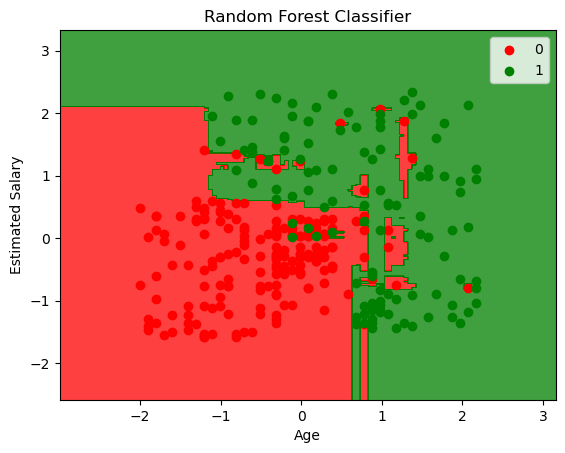

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use the training set for visualization
X_set, y_set = X_train, y_train

# Create a mesh grid for plotting decision boundaries
# np.meshgrid() creates a rectangular grid out of two given one-dimensional arrays
# np.arange() generates values from the minimum to the maximum value of the feature with a step of 0.01
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predict the class for each point in the mesh grid
# clf.predict() is used to predict the class labels for the input samples
# np.ravel() flattens the array, and np.array().T transposes the array
# reshape() reshapes the array to match the shape of X1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
# np.unique() finds the unique elements of an array
# plt.scatter() creates a scatter plot of the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Set the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add title and labels to the plot
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # Add a legend to the plot
plt.show()


In [8]:
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function from sklearn.metrics

# Predict the class labels for the test set
# clf.predict() uses the trained Random Forest model to predict the labels for X_test
y_pred = clf.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
# confusion_matrix() compares the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)


[[63  5]
 [ 4 28]]
